In [10]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

#FROM the sample data of one day to conacatinate all the csv files of each hour into a single one

file_path = '/Users/thomas/Desktop/phd_unipv/Industrial_PhD/Data/20241126/csv_incl/combined_inc_26_11_2024.csv'



master_df = pd.read_csv(file_path, sep=';')     
  



/var/folders/d7/dj_4mq8d06360634vn1zgy8w0000gn/T/ipykernel_54569/3110070342.py:12: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212) have mixed types. Specify dtype option on import or set low_memory=False.
  master_df = pd.read_csv(file_path, sep=';')


In [12]:
#converting time column to datetime to recognise the dates
#master_df['time'] = pd.to_datetime(master_df['time'], format='%Y/%m/%d %H:%M:%S')

master_df.head()

master_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86423 entries, 0 to 86422
Columns: 213 entries, time to 0309123B_y
dtypes: object(213)
memory usage: 140.4+ MB


In [13]:
#selecting the datetime column to index for resampling 
master_df = master_df.set_index('time')

master_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 86423 entries, 2024/11/26 00:00:00 to 2024/11/26 23:59:59
Columns: 212 entries, 03091002_y to 0309123B_y
dtypes: object(212)
memory usage: 140.4+ MB


<Axes: xlabel='time'>

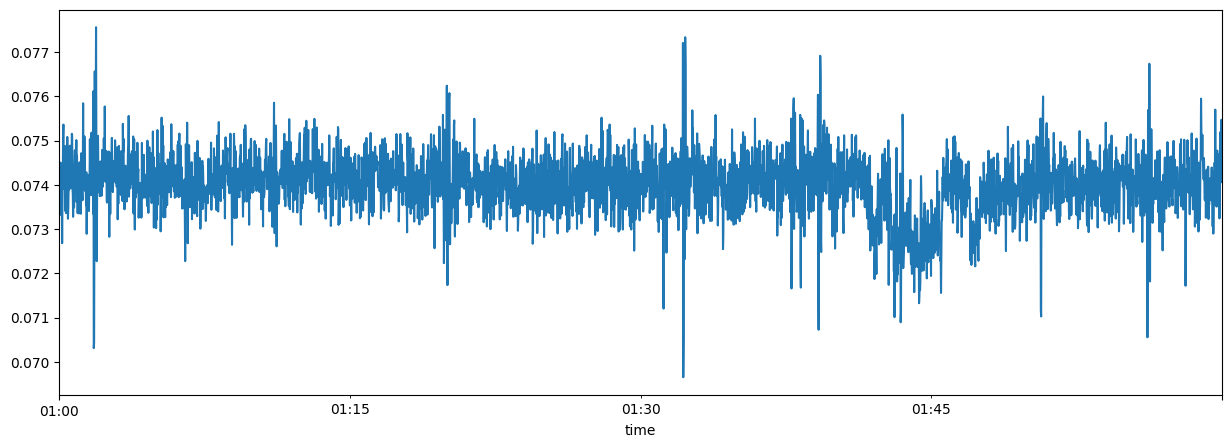

In [5]:
master_df['03091005_y'].plot(figsize=(15,5))

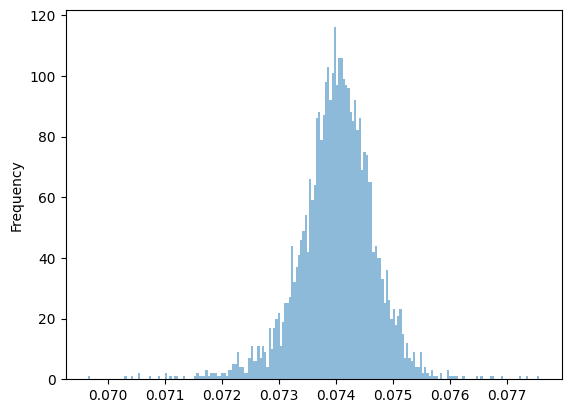

In [7]:
histogram = master_df['03091005_y'].plot.hist(bins=200, alpha=0.5)


In [8]:
#resampling by min freq
df_by_min = master_df.resample('T').mean()

print(df_by_min)

                     03091002_y  03091002_z  03091003_y  03091003_z  \
time                                                                  
2024-11-26 01:00:00   -0.736215   -2.429400    1.804027    0.421490   
2024-11-26 01:01:00   -0.736067   -2.429580    1.804054    0.421468   
2024-11-26 01:02:00   -0.736355   -2.429662    1.804271    0.421656   
2024-11-26 01:03:00   -0.736166   -2.429421    1.804090    0.421777   
2024-11-26 01:04:00   -0.736200   -2.429553    1.804127    0.421779   
2024-11-26 01:05:00   -0.736249   -2.429725    1.804357    0.421783   
2024-11-26 01:06:00   -0.736472   -2.429533    1.804426    0.421589   
2024-11-26 01:07:00   -0.736444   -2.429338    1.804393    0.421797   
2024-11-26 01:08:00   -0.736158   -2.429640    1.804237    0.421779   
2024-11-26 01:09:00   -0.736351   -2.429587    1.804378    0.421807   
2024-11-26 01:10:00   -0.736216   -2.429279    1.804446    0.421790   
2024-11-26 01:11:00   -0.736518   -2.429714    1.804414    0.421392   
2024-1

/var/folders/d7/dj_4mq8d06360634vn1zgy8w0000gn/T/ipykernel_54569/3328471170.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_by_min = master_df.resample('T').mean()


<Axes: xlabel='time'>

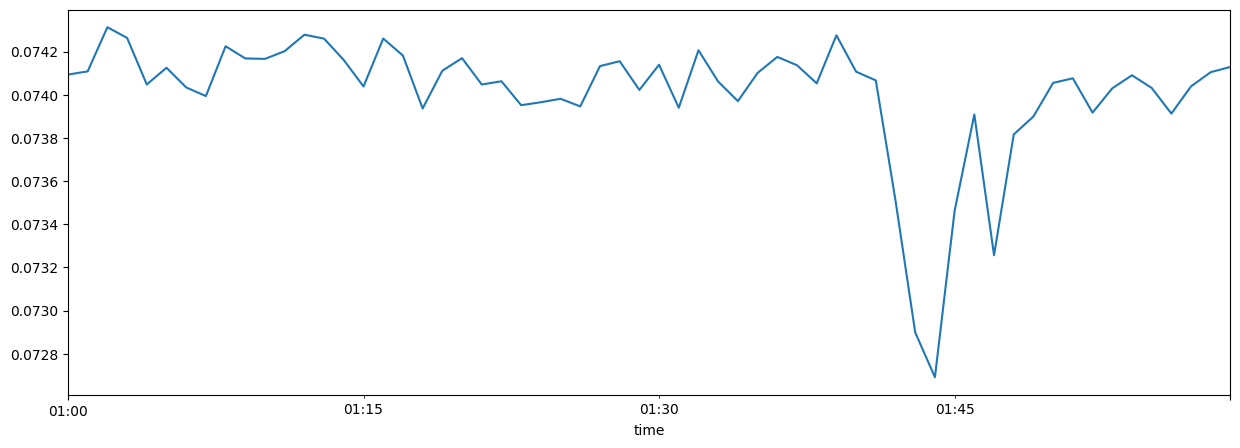

In [9]:
df_by_min['03091005_y'].plot(figsize=(15,5))